In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer

### Import and Explore dataset

In [13]:
df_gender = pd.read_csv('gender_submission.csv')

In [4]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [2]:
X_train = pd.read_csv('train.csv')

In [3]:
X_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
X_train.groupby(['Sex', 'Survived']).count().reset_index()

,Sex,Survived,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,0,81,81,81,81,81,81,81,81,6,81
1,female,1,233,233,233,233,233,233,233,233,91,231
2,male,0,468,468,468,468,468,468,468,468,62,468
3,male,1,109,109,109,109,109,109,109,109,45,109


In [4]:
X_test = pd.read_csv('test.csv')

In [5]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Fill empty values

In [8]:
X_train['Age'].fillna((X_train['Age'].mean()), inplace=True)

#### Drop the column 'Cabin' and the two rows with missing 'Embarked' values

In [26]:
X_train.drop(['Cabin'], axis=1, inplace=True) #drop cabin

In [28]:
X_train['Embarked'] = X_train['Embarked'].fillna('none')
for index, row in X_train.iterrows():   # drop rows missing embarked
    if row['Embarked'] == 'none':
        X_train.drop(index=index, inplace=True)

In [29]:
X_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Data Analysis

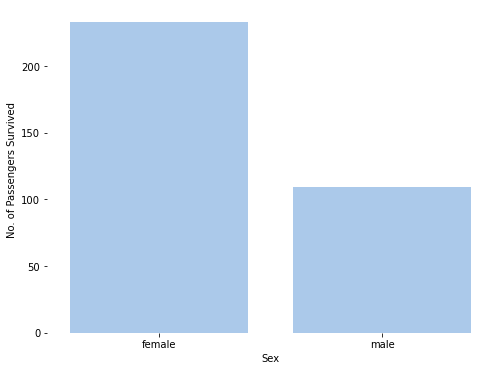

In [23]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# load the dataset
survived_gender = X_train[X_train.Survived == 1]
survived_gender = survived_gender.groupby(['Sex', 'Survived']).count()
survived_gender.reset_index(inplace=True)

# Plot the total No. of Days
sns.set_color_codes("pastel")
sns.barplot(x=survived_gender['Sex'], y=survived_gender['Age'], data=survived_gender,
           label="No of Survived Passengers", color="b")

ax.set(xlabel="Sex",
       ylabel="No. of Passengers Survived")
sns.despine(left=True, bottom=True)

#### Separate target variable

In [24]:
X = X_train.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
y = X_train.loc[:, 'Survived']

#### Drop column with a lot of empty values